In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
ls


500indcities_vis_code.rmd        admission_logistic.csv
HotelRoomsByStateIndia_2016.csv  dataset_jhu_reg.csv
K-means/                         ml-1m/
K-means_driverFleet.csv          ml-1m.zip
LR_GRADIENT DESCENT/             top-500-indian-cities.zip
Untitled.ipynb


In [4]:
cd ml-1m

/Users/sparthasarathy/Documents/Data Science Workshop/Datasets/ml-1m


In [53]:
usersDF = pd.read_csv("users.dat",sep="::")

/Users/sparthasarathy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [14]:
usersDF.head()

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [24]:
usersDF_mod = pd.read_csv("users.dat",sep="::",names = ['userID','gender','age','occupation','zipcode'])

/Users/sparthasarathy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [25]:
usersDF_mod.head()

,userID,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
moviesDF = pd.read_csv("movies.dat",sep="::")

/Users/sparthasarathy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [6]:
ratingsDF = pd.read_csv("ratings.dat",sep="::")

/Users/sparthasarathy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [17]:
ratingsDF.head()

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [18]:
ratingsDF_mod = pd.read_csv("ratings.dat",sep="::",header=None, names = ['UserID','MovieID','Rating','TimeStamp'])

/Users/sparthasarathy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [19]:
ratingsDF_mod.head()

,UserID,MovieID,Rating,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
moviesDF.head()

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [20]:
moviesDF_mod = pd.read_csv("movies.dat",sep="::",header=None,names=['MovieID','MovieName','GenreFull'])

/Users/sparthasarathy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [21]:
moviesDF_mod.head()

,MovieID,MovieName,GenreFull
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
###credit: stackoverflow

def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df


## df.dropna   
## enumerate   
## .split   
## list.append  
## df.iloc


In [22]:
moviesDF_splitGenre = tidy_split(moviesDF_mod,'GenreFull',sep="|")

In [23]:
moviesDF_splitGenre.head()

,MovieID,MovieName,GenreFull
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's


In [27]:
movieRatingDF = moviesDF_splitGenre.merge(ratingsDF_mod,how='inner',on = 'MovieID')

In [28]:
movieRatingDF.head()

,MovieID,MovieName,GenreFull,UserID,Rating,TimeStamp
0,1,Toy Story (1995),Animation,1,5,978824268
1,1,Toy Story (1995),Animation,6,4,978237008
2,1,Toy Story (1995),Animation,8,4,978233496
3,1,Toy Story (1995),Animation,9,5,978225952
4,1,Toy Story (1995),Animation,10,5,978226474


In [32]:
GenreRatingStats = movieRatingDF.groupby('GenreFull').agg({'Rating': [np.size, np.mean]})

In [33]:
GenreRatingStats.head()

Rating          
              size      mean
GenreFull                   
Action      257457  3.491185
Adventure   133953  3.477257
Animation    43293  3.684868
Children's   72186  3.422035
Comedy      356580  3.522099

In [39]:
GenreRatingStats['Rating','size'].min()

7910

In [44]:
GenreRatingStats.sort_values([('Rating','mean')],ascending=False)[:10]

Rating          
               size      mean
GenreFull                    
Film-Noir     18261  4.075188
Documentary    7910  3.933123
War           68527  3.893327
Drama        354529  3.766332
Crime         79541  3.708679
Animation     43293  3.684868
Mystery       40178  3.668102
Musical       41533  3.665519
Western       20683  3.637770
Romance      147523  3.607465

In [49]:
%matplotlib inline

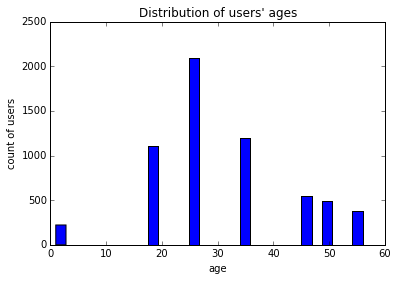

In [61]:
usersDF_mod.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [51]:
usersDF_mod.count()

userID        6040
gender        6040
age           6040
occupation    6040
zipcode       6040
dtype: int64

In [56]:
usersDF.count()

1        6039
F        6039
1.1      6039
10       6039
48067    6039
dtype: int64

In [62]:
usersDF_mod[(usersDF_mod['age']>10) & (usersDF_mod['age']<15)]

,userID,gender,age,occupation,zipcode
